# The OSNET model pretrained on Market1501 dataset was used

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!git clone https://github.com/KaiyangZhou/deep-person-reid.git
!cd deep-person-reid
!pwd

Cloning into 'deep-person-reid'...
remote: Enumerating objects: 9876, done.
remote: Counting objects: 100% (826/826), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 9876 (delta 746), reused 717 (delta 717), pack-reused 9050 (from 1)
Receiving objects: 100% (9876/9876), 9.53 MiB | 7.75 MiB/s, done.
Resolving deltas: 100% (7314/7314), done.
/content


In [3]:
import os
os.chdir("deep-person-reid")
print(os.getcwd())

/content/deep-person-reid


In [4]:
!pip install -r requirements.txt
!python setup.py develop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 3.8 MB/s eta 0:00:00
/content/deep-person-reid/torchreid/metrics/rank.py:11: UserWarning: Cython evaluation (very fast so highly recommended) is unavailable, now use python evaluation.
  warnings.warn(
2025-12-09 16:48:22.168002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765298902.189976    1968 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN

In [5]:
import torchreid
from torchreid.utils import FeatureExtractor, load_pretrained_weights
import torch
import numpy as np

In [6]:
model = torchreid.models.build_model(
    name='osnet_x1_0',
    num_classes=751,
    loss='softmax'           # loss type used during training
)

# Load the pretrained weights
load_pretrained_weights(model, '/content/drive/MyDrive/Colab Notebooks/torchreid_project/pretrained_models/osnet_x1_0_market_256x128_amsgrad_ep150_stp60_lr0.0015_b64_fb10_softmax_labelsmooth_flip.pth')

model = model.cuda('cuda')
model.eval()  # Set model to evaluation mode

Downloading...
From: https://drive.google.com/uc?id=1LaG1EJpHrxdAxKnSCJ_i0u-nbxSAeiFY
To: /root/.cache/torch/checkpoints/osnet_x1_0_imagenet.pth
100%|██████████| 10.9M/10.9M [00:00<00:00, 15.3MB/s]


Successfully loaded imagenet pretrained weights from "/root/.cache/torch/checkpoints/osnet_x1_0_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Successfully loaded pretrained weights from "/content/drive/MyDrive/Colab Notebooks/torchreid_project/pretrained_models/osnet_x1_0_market_256x128_amsgrad_ep150_stp60_lr0.0015_b64_fb10_softmax_labelsmooth_flip.pth"


OSNet(
  (conv1): ConvLayer(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2): Sequential(
    (0): OSBlock(
      (conv1): Conv1x1(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (conv2a): LightConv3x3(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (conv2b): Sequential(
        (

In [7]:
# Initialize the feature extractor
extractor = FeatureExtractor(
    model_name='osnet_x1_0',
    model_path='/content/drive/MyDrive/Colab Notebooks/torchreid_project/pretrained_models/osnet_x1_0_market_256x128_amsgrad_ep150_stp60_lr0.0015_b64_fb10_softmax_labelsmooth_flip.pth',  # path to pretrained weights
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

Model: osnet_x1_0
- params: 2,193,616
- flops: 978,878,352
Successfully loaded pretrained weights from "/content/drive/MyDrive/Colab Notebooks/torchreid_project/pretrained_models/osnet_x1_0_market_256x128_amsgrad_ep150_stp60_lr0.0015_b64_fb10_softmax_labelsmooth_flip.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']


### now comparing images from datasets

In [8]:
!pip install rarfile

In [9]:
!pwd
os.chdir('/content/')

/content/deep-person-reid


In [10]:
import rarfile
from PIL import Image

rar_path = "/content/drive/MyDrive/Colab Notebooks/torchreid_project/images.rar"
extract_dir = "extracted_images/"
resized_dir = "resized_dataset"

def resize_image(file_path):
  try:
    img = Image.open(file_path).convert("RGB")
    img = img.resize((128, 256))
    return img
  except Exception as e:
    print(f"Error processing {file_path}: {e}")
    return None

def save_resized_images(rar_path,extract_dir,resized_dir):

  os.makedirs(extract_dir, exist_ok=True)
  os.makedirs(resized_dir, exist_ok=True)

  with rarfile.RarFile(rar_path) as rf:
      rf.extractall(path=extract_dir)
  # after extraction new dir of images will be extracted_images/images/sample11.jpg
  extract_dir = "extracted_images/images/"
  for filename in os.listdir(extract_dir):
      file_path = os.path.join(extract_dir, filename)

      if filename.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".webp", ".tiff")):
          try:
              img = Image.open(file_path).convert("RGB")
              img = img.resize((128, 256))
              img = resize_image(file_path)

              base_filename = os.path.basename(filename)
              # base_filename = os.path.basename(filename)[0]
              save_path = os.path.join(resized_dir, base_filename)
              img.save(save_path)

          except Exception as e:
              print(f"Error processing {filename}: {e}")

  print("Resizing completextractor = extractor.to(device)e.")
save_resized_images(rar_path,extract_dir,resized_dir)

Resizing completextractor = extractor.to(device)e.


In [11]:
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.Resize((256, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def load_image(path):
    img = Image.open(path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)
    return img_tensor

def cosine_similarity(f1, f2):
    f1 = np.array(f1.cpu())
    f2 = np.array(f2.cpu())
    f1 = f1 / np.linalg.norm(f1) # normalize
    f2 = f2 / np.linalg.norm(f2) # normalize
    return np.dot(f1, f2)

def show_images(query_image, test_image):
  query_img = Image.open(query_image).convert('RGB')
  test_img = Image.open(test_image).convert('RGB')

  fig, axs = plt.subplots(1, 2, figsize=(10, 5))

  axs[0].imshow(query_img)
  axs[0].axis('off')
  axs[0].set_title('query image')

  axs[1].imshow(test_img)
  axs[1].axis('off')
  axs[1].set_title('test image')

  plt.tight_layout()
  plt.show()

def calculate_cosine_simlarity_using_embedding(extractor,query_image,test_image):
  query_embedding = extractor(load_image(query_image))[0]
  test_embedding = extractor(load_image(test_image))[0]
  # tensor = tensor.to('cuda')

  print("shape of embedding ",query_embedding.shape)

  cosine_sim = cosine_similarity(query_embedding, test_embedding)
  return cosine_sim



shape of embedding  torch.Size([512])
cosine similarity using osnet_x1_0      : 0.4169284999370575


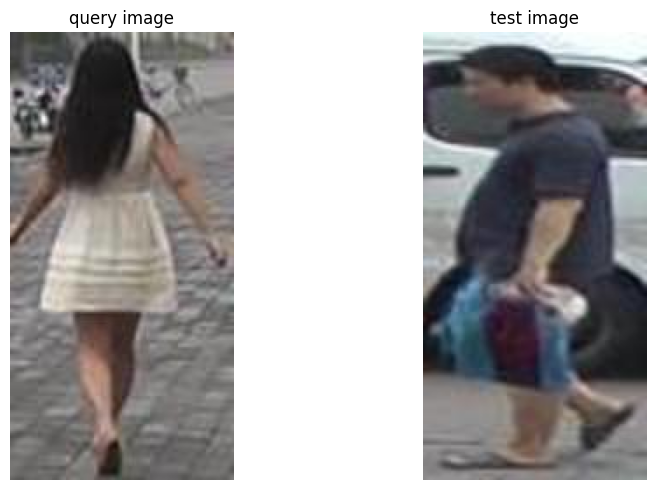

In [17]:
query_image = "/content/resized_dataset/sample11.jpg"
test_image = "/content/resized_dataset/sample22.jpg"



cosine_sim1 = calculate_cosine_simlarity_using_embedding(extractor,query_image,test_image)
# cosine_sim2 = calculate_cosine_simlarity_using_embedding(extractor_ain,query_image,test_image)
# cosine_sim3 = calculate_cosine_simlarity_using_embedding(extractor_ibn,query_image,test_image)

print(f"cosine similarity using osnet_x1_0      : {cosine_sim1}")
# print(f"cosine similarity using osnet_ain_x1_0  : {cosine_sim2}")
# print(f"cosine similarity using osnet_ibn_x1_0  : {cosine_sim3}")

show_images(query_image, test_image)

In [21]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((256, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def load_image(path):
    img = Image.open(path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)
    return img_tensor

def calculate_embeddings_all_images(extractor,resized_dir):
    embeddings_dict = {}

    for filename in os.listdir(resized_dir):
        if filename.lower().endswith(".jpg"):
            file_path = os.path.join(resized_dir, filename)
            try:
                img = load_image(file_path)
                embedding = extractor(img)[0]
                embeddings_dict[filename] = embedding
            except Exception as e:
                print(f"Failed to process {filename}: {e}")

    sorted_dict = dict(sorted(embeddings_dict.items(), key=lambda item: item[0].lower()))
    print("sorted_dict ",sorted_dict['sample11.jpg'].shape)
    return sorted_dict

# extractor = extractor
# extractor = extractor_ain
# extractor = extractor_ibn
embeddings_dict = calculate_embeddings_all_images(extractor, resized_dir)

sorted_dict  torch.Size([512])


In [22]:
def compute_cosine_similarity_with_all_images(embeddings_dict):
    filenames = list(embeddings_dict.keys())
    embeddings = torch.stack([embeddings_dict[f] for f in filenames])  # shape: (N, D (512))

    embeddings_norm = embeddings / embeddings.norm(dim=1, keepdim=True) # nrmalize embeddings to unit vectors
    similarity_matrix = torch.matmul(embeddings_norm, embeddings_norm.T).cpu().numpy()

    return filenames, similarity_matrix

filenames,similarity_matrix = compute_cosine_similarity_with_all_images(embeddings_dict)
filenames, similarity_matrix

(['sample11.jpg',
  'sample12.jpg',
  'sample13.jpg',
  'sample14.jpg',
  'sample15.jpg',
  'sample21.jpg',
  'sample22.jpg',
  'sample23.jpg',
  'sample24.jpg',
  'sample25.jpg'],
 array([[1.        , 0.83729994, 0.85561574, 0.8441029 , 0.8864279 ,
         0.37230825, 0.41692847, 0.38630828, 0.4270051 , 0.40581584],
        [0.83729994, 1.        , 0.86552477, 0.8098521 , 0.83349574,
         0.40043575, 0.43804136, 0.41362602, 0.4399279 , 0.43079913],
        [0.85561574, 0.86552477, 1.        , 0.8339637 , 0.88839585,
         0.38301915, 0.4397517 , 0.41203445, 0.44177684, 0.42764324],
        [0.8441029 , 0.8098521 , 0.8339637 , 0.99999994, 0.8124746 ,
         0.36570358, 0.43449053, 0.41297176, 0.41260916, 0.42456803],
        [0.8864279 , 0.83349574, 0.88839585, 0.8124746 , 1.0000001 ,
         0.39972994, 0.43303376, 0.4031991 , 0.45074013, 0.42126042],
        [0.37230825, 0.40043575, 0.38301915, 0.36570358, 0.39972994,
         1.0000001 , 0.7580806 , 0.82210445, 0.88093436

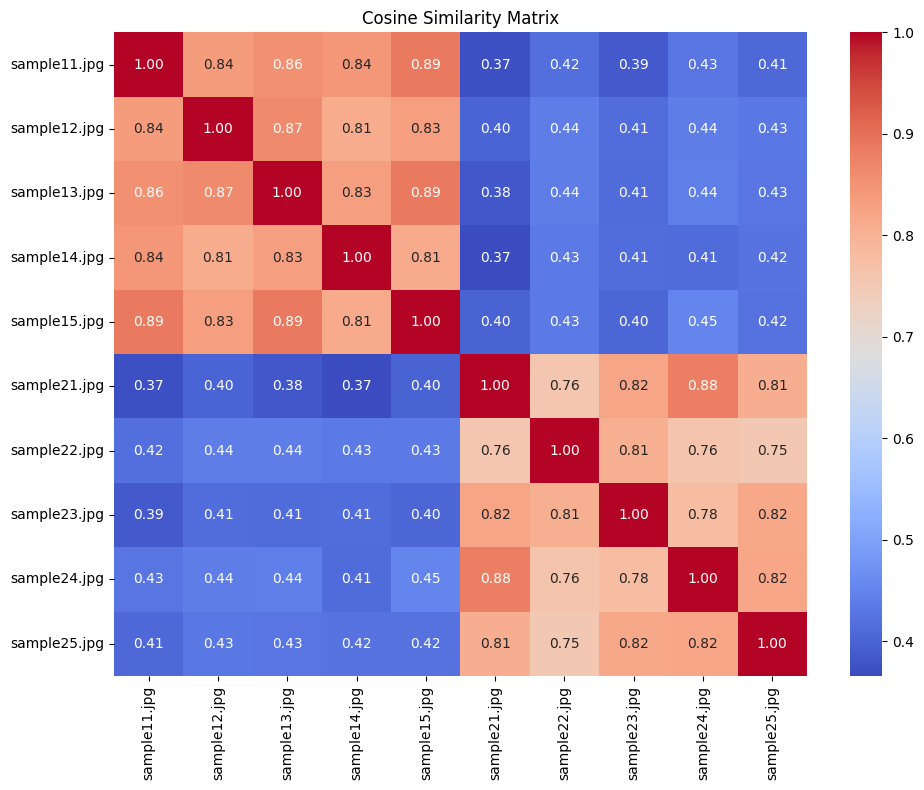

In [23]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns

def plot_similarity_matrix(filenames, similarity_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, xticklabels=filenames, yticklabels=filenames, cmap='coolwarm', annot=True, fmt=".2f")
    plt.title("Cosine Similarity Matrix")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_similarity_matrix(filenames, similarity_matrix)

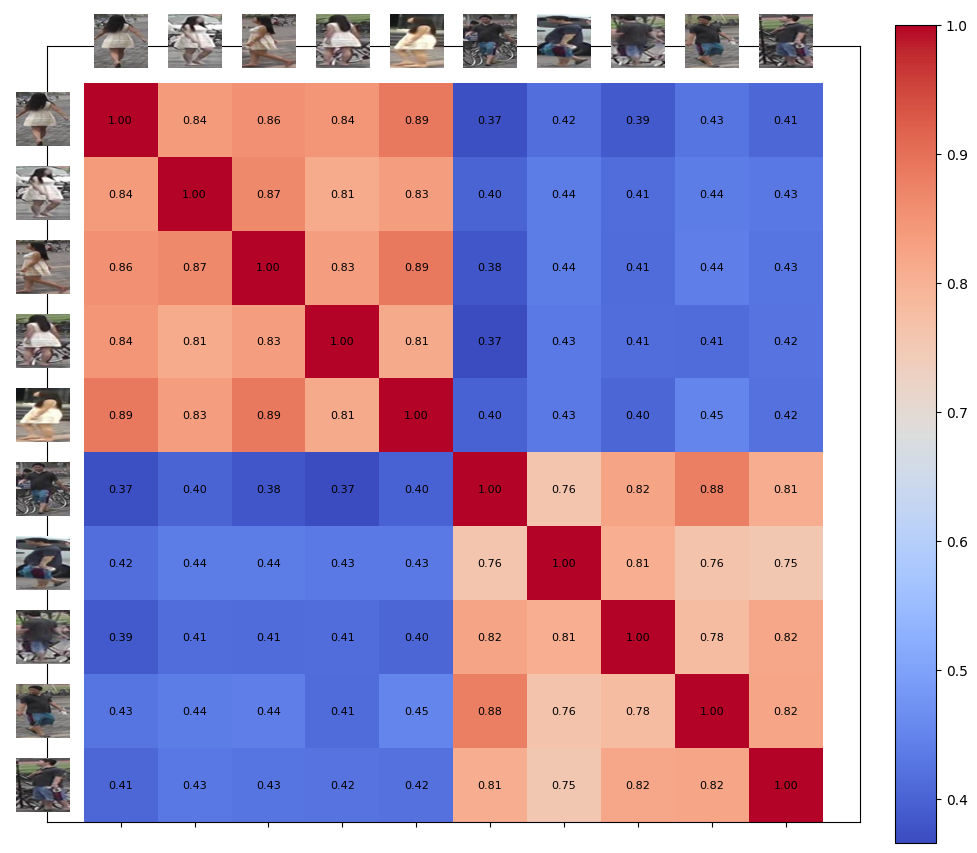

In [24]:
def plot_similarity_with_images(resized_dir, filenames, similarity_matrix):
    fig, ax = plt.subplots(figsize=(10, 10))

    plt.subplots_adjust(left=0.5, bottom=0.5)

    cax = ax.matshow(similarity_matrix, cmap='coolwarm')

    ax.set_xticks(range(len(filenames)))
    ax.set_yticks(range(len(filenames)))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    for (i, j), val in np.ndenumerate(similarity_matrix):
        ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black', fontsize=8)

    for i, fname in enumerate(filenames):
        image_path = os.path.join(resized_dir, fname)
        img = Image.open(image_path).convert("RGB").resize((64, 64))
        imagebox = OffsetImage(img, zoom=0.6)
        ab = AnnotationBbox(imagebox, (i, -0.7), frameon=False, box_alignment=(0.5, 0))
        ax.add_artist(ab)

    for i, fname in enumerate(filenames):
        image_path = os.path.join(resized_dir, fname)
        img = Image.open(image_path).convert("RGB").resize((64, 64))
        imagebox = OffsetImage(img, zoom=0.6)
        ab = AnnotationBbox(imagebox, (-0.7, i), frameon=False, box_alignment=(1, 0.5))
        ax.add_artist(ab)

    ax.set_xlim(-1, len(filenames))
    ax.set_ylim(len(filenames)-0.5, -1)

    fig.colorbar(cax, fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

resized_dir = "resized_dataset"
plot_similarity_with_images(resized_dir, filenames, similarity_matrix)

In [25]:
sim_matrix = similarity_matrix
sim_matrix

array([[1.        , 0.83729994, 0.85561574, 0.8441029 , 0.8864279 ,
        0.37230825, 0.41692847, 0.38630828, 0.4270051 , 0.40581584],
       [0.83729994, 1.        , 0.86552477, 0.8098521 , 0.83349574,
        0.40043575, 0.43804136, 0.41362602, 0.4399279 , 0.43079913],
       [0.85561574, 0.86552477, 1.        , 0.8339637 , 0.88839585,
        0.38301915, 0.4397517 , 0.41203445, 0.44177684, 0.42764324],
       [0.8441029 , 0.8098521 , 0.8339637 , 0.99999994, 0.8124746 ,
        0.36570358, 0.43449053, 0.41297176, 0.41260916, 0.42456803],
       [0.8864279 , 0.83349574, 0.88839585, 0.8124746 , 1.0000001 ,
        0.39972994, 0.43303376, 0.4031991 , 0.45074013, 0.42126042],
       [0.37230825, 0.40043575, 0.38301915, 0.36570358, 0.39972994,
        1.0000001 , 0.7580806 , 0.82210445, 0.88093436, 0.80798936],
       [0.41692847, 0.43804136, 0.4397517 , 0.43449053, 0.43303376,
        0.7580806 , 1.        , 0.80553085, 0.76214933, 0.75409746],
       [0.38630828, 0.41362602, 0.4120344

In [26]:
# To get the confusion matrix
from sklearn.metrics import confusion_matrix

# Example: Replace this with your actual 10x10 cosine similarity matrix
# sim_matrix = np.array([...])
# Step 1: Assign ground truth labels
labels = [0]*5 + [1]*5  # 0 for Identity A, 1 for Identity B

# Step 2: Predict identity for each image
predicted = []
for i in range(len(labels)):
    sim_row = sim_matrix[i].copy()
    sim_row[i] = -np.inf  # Exclude self-similarity
    pred_idx = np.argmax(sim_row)
    predicted.append(labels[pred_idx])

# Step 3: Compute the confusion matrix
cm = confusion_matrix(labels, predicted)
print("Confusion Matrix:")
print(cm)

# Optional: Display as a labeled table
import pandas as pd
df_cm = pd.DataFrame(cm, index=["Actual A", "Actual B"], columns=["Predicted A", "Predicted B"])
print(df_cm)

Confusion Matrix:
[[5 0]
 [0 5]]
          Predicted A  Predicted B
Actual A            5            0
Actual B            0            5
